# Dia 2 - Métodos Supervisionados
Tópicos que serão abordados: 
- Métodos supervisionados:
    - Regressão Linear
    - KNN
    - Árvore de decisão
    - SVM

Bibliotecas usadas:<br>
Scikit-learn http://scikit-learn.org/stable/index.html<br>
Matplotlib https://matplotlib.org/api/pyplot_api.html<br>
Pandas http://pandas.pydata.org/pandas-docs/stable/<br>

## Passo a passo de como tratar um problema
1. Formulação do problema
2. Base de dados
3. Tratamento dos dados (quando necessário)
4. Treinamento dos algoritmos
5. Predição para novos elementos 
6. Análise dos resultados (opcional, porém recomendado)

## Regressão Linear

Uma forma de calcular regressão linear é utilizando Mínimos Quadrados:

In [1]:
# Importando bibliotecas necessárias
# Dúvidas? veja links para documentações acima
import matplotlib.pyplot as plt
import numpy as np
!pip install scipy
!pip install sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

The directory '/home/cursopython/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/cursopython/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/cursopython/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/cursopython/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H 

Nesse primeiro momentos iremos trabalhar com uma base de dados chamada diabetes, nosso problema é conseguir estimar como é a taxa de glicose de uma pessoa (se é diabética) considerando uma série de atributos associados a essa pessoa.

Com isso, nosso segundo passo é conhecer a base:

In [2]:
# Carregando a base de dados "diabetes"
diabetes = datasets.load_diabetes()

# Base de dados contém um array bidimensinal do numpy de dimensões 442,10 (data)
# (442 arrays com 10 elementos cada)
X = diabetes.data
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ..., -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ..., -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ..., -0.00259226  0.00286377
  -0.02593034]
 ..., 
 [ 0.04170844  0.05068012 -0.01590626 ..., -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...,  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ..., -0.03949338 -0.00421986
   0.00306441]]


Cada linha em data é uma sample (amostra): nesse caso, um paciente; com 10 features (atributos) cada, informações coletadas sobre eles.

In [3]:
# E um array simples com 442 elementos (target)
y = diabetes.target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(442,)
[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  268.  274.  158.
  107.   83.  103.  272.   85.  280.  336.  281.  118.  317.  235.   60.
  174.  259.  178.  128.   96.  126.  288.   88.  292.   71.  197.  186.
   25.   84.   96.  

Cada número em target é um valor associado à uma das linhas de data, algo que vamos querer prever dado uma nova amostra fora do nosso conjunto de dados inicial.<br>
Nesse caso podemos dizer que temos um dataset que nos dá o nível de glicose de um paciente (o target) junto a outras informações dele (atributos).<br>

Vamos agora separar esses dados de forma que parte será usada para treinar esse modelo, e parte para testá-lo.

In [4]:
# Separa apenas parte dos atributos para serem utilizados
atr = 2
X = diabetes.data[:,np.newaxis, atr]

# Separando a base de dados entre treinamento e teste
# test_size determina a porcentagem de dados que irá ser guardada para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Criando um objeto de regressão linear
linreg = LinearRegression()

# Treinamento usando X e y
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Finalmente vamos executar o algoritmo para novos elementos (que ficaram separados na parte de teste).

In [5]:
# Obtendo predição do primeiro valor no array de testes:
pred = linreg.predict(X_test[0])

print("Para o primeiro valor no array de testes:")
print("-> Valor estimado %.2f." % pred)
print("-> Valor real é %.2f." % y_test[0])

Para o primeiro valor no array de testes:
-> Valor estimado 105.07.
-> Valor real é 74.00.


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


A seguir fazemos uma análise do desempenho do algoritmo. Ao ligarmos cada ponto (o valor estimado) a reta diagonal, temos a distância que mede o erro do algoritmo. 

Coeficientes:  [ 989.658311]
Constante:  150.683044184
Erro quadrático médio: 3705.06
Variância: 0.32


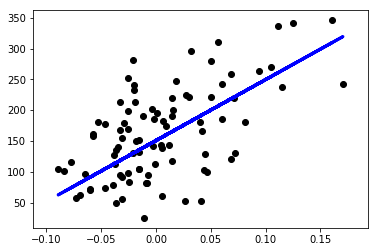

In [6]:
# Imprimindo os coeficientes de cada feature estimados para a regressão da diabetes
print('Coeficientes: ', linreg.coef_)
# e a constante associada
print('Constante: ', linreg.intercept_)

# Obtendo previsões para todo o conjunto de testes
y_pred = linreg.predict(X_test)

# Cálculo do Erro quadrático médio
print("Erro quadrático médio: %.2f"
      % np.mean((y_pred - y_test) ** 2))
# Cálculo da variância
print('Variância: %.2f' % linreg.score(X_test, y_test))

# Gráficos
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

Vamos fazer mais um exemplo usando agora Pandas e um novo banco de dados considerando todos os atributos dessa vez: preços de casas em Boston. Nosso problema é estimar o valor das casas (descrição completa da base será mostrada a seguir). 

In [7]:
import pandas as pd
boston = datasets.load_boston()

In [8]:
print("Quantidade de linhas por colunas:", boston.data.shape)
print("Nomes das colunas:", boston.keys())
print("Atributos:", boston.DESCR)

Quantidade de linhas por colunas: (506, 13)
Nomes das colunas: dict_keys(['DESCR', 'data', 'feature_names', 'target'])
Atributos: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [9]:
# Vamos passar a base de dados para um objeto Panda
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Acrescentando uma coluna com os valores 
boston_pd["PRICE"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exercício 1 (Regressão Linear)
Divida a base de dados em uma parte para treino e outra para testes e faça as estimativas. Também desenhe um gráfico com eixo X valor estimado e eixo Y valor real.

In [11]:
# Solução:
X = boston_pd.drop("PRICE", axis = 1)
y = boston_pd.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y)

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Valor estimado: 9.10175921472 Valor real: 11.8
Valor estimado: 18.4031043374 Valor real: 12.1
Valor estimado: 16.4239377852 Valor real: 17.6
Valor estimado: 18.3459038121 Valor real: 20.1
Valor estimado: 24.266730014 Valor real: 21.9
Valor estimado: 20.7614261043 Valor real: 19.3
Valor estimado: 25.0349961094 Valor real: 50.0
Valor estimado: 18.7703413306 Valor real: 18.2
Valor estimado: 24.8151129746 Valor real: 29.6
Valor estimado: 17.2300573344 Valor real: 23.1
Valor estimado: 12.5636248663 Valor real: 13.4
Valor estimado: 13.4339026707 Valor real: 12.8
Valor estimado: 28.4511972972 Valor real: 24.4
Valor estimado: 21.9007733367 Valor real: 20.1
Valor estimado: 19.6130338743 Valor real: 12.5
Valor estimado: 32.467683345 Valor real: 27.0
Valor estimado: 20.6633309317 Valor real: 18.3
Valor estimado: 23.2822959974 Valor real: 25.0
Valor estimado: 17.3806515863 Valor real: 13.0
Valor estimado: 23.476450797 Valor real: 21.7
Valor estimado: 28.647672841 Valor real: 28.4
Valor estimado: 4

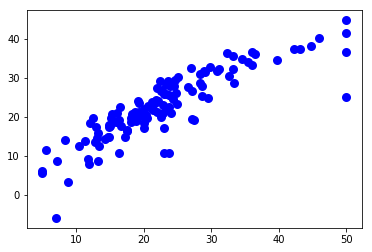

In [12]:
for p, r in zip(regr.predict(X_test), y_test):
    print("Valor estimado:", p, "Valor real:", r)

# Gráfico
plt.scatter(y_test, regr.predict(X_test), color='blue', linewidth=3)
plt.show()

# Fonte: http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

## K-Nearest Neighbors (KNN)

Vamos ao segundo algoritmo de aprendizado supervisionado, chamado KNN. Nesse primeiro momento vamos apresentar o KNN como um classificador. 

In [13]:
# Dúvidas sobre documentação? Disponível em 
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Nosso objetivo nesse momento é saber classificar plantas Íris. A base de dados possui 3 classes, 50 amostras de cada uma. Nesse primeiro momento vamos utilizar apenas um atributo para fazer as etimativas.

In [14]:
# Base de dados (http://archive.ics.uci.edu/ml/datasets/Iris)
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [15]:
print(iris.data[0:3])
X = iris.data[:, :2] # selecionando apenas o que nos interessa
print(X[0:3])
y = iris.target
print(y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# Definição de alguns parâmetros
# Quantidade de vizinhos que será considerada
n_neighbors = 15
h = 0.1 
# Cores que serão utilizadas nos gráficos
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Processo de treinamento e testes é feito a seguir.

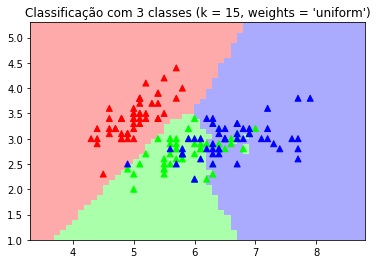

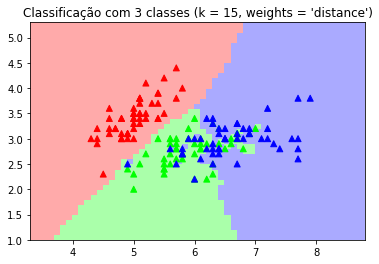

In [17]:
# O algoritmo será executado duas vezes para os casos em que o 
# o parâmetro weights é uniform e depois distance (muda a função utilizada para fazer predições),
# também pode ser informada uma função definida pelo usuário
# Esse parâmetro é a função utilizada para predição de novos valores, 
# o peso que vamos dar aos vizinhos
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Gera os valores de x_min a x_max e y_min a y_max 
    # e depois gera todos os pontos possíveis entre esses dois valores
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = clf.predict(points)

    # Formata Z para ficar com a mesma quantidade de linhas e colunas de xx e yy
    # Pontos usados para plotar a parte mais clara do gráfico
    # Dessa forma, temos xx[i], yy[i], Z[i] como sendo Z[i] a classe para o ponto xx[i],yy[i]
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) # Usado para pintar um grid 

    # Plota os pontos usados como treino
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, marker="^")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Classificação com 3 classes (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [18]:
#Esclarecimentos a respeito do que acontece dentro do loop (com um exemplo mais simples)
#xx, yy = np.meshgrid(np.arange(0, 1, 0.2), np.arange(2, 3, 0.2))
#print(xx)
#print(yy)
#print(xx.ravel())
#np.c_[xx.ravel(), yy.ravel()]

Agora vamos apresentar o KNN como um estimador. Portanto, nosso problema muda para aprender a estimar os valores para novos objetos além dos que foram usados para treino. 

Essa estimativa é feita pegando os K elementos mais próximos do ponto que pretendemos estimar e calculando a média deles.

In [19]:
# Dúvidas? Mais informações disponíveis em:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

##############################################################################
# Nossa base de dados gerada aleatoriamente
##############################################################################
# Gerando uma base de dados aleatória
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Adicionando ruídos
y[::5] += 1 * (0.5 - np.random.rand(8))

##############################################################################
# Parâmetros
##############################################################################
n_neighbors = 5

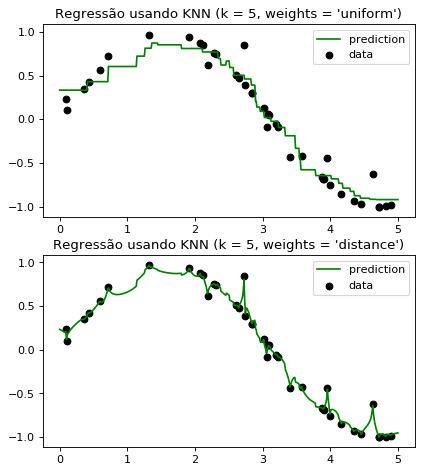

In [20]:
plt.figure(num = None, figsize = (6, 7), dpi = 80)
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights = weights)
    ##############################################################################
    # Treinamento
    ##############################################################################
    pred = knn.fit(X, y)
    
    ##############################################################################
    # Testes
    ##############################################################################
    y_ = pred.predict(T)
    
    ##############################################################################
    # Exibição dos resultados em gráfico
    ##############################################################################
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c = 'k', label = 'data')
    plt.plot(T, y_, c = 'g', label = 'prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("Regressão usando KNN (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## Exercício 2 (KNN)

Vamos fazer uma comparação entre a regressão linear e o KNN (como estimadores)?

A base de dados utilizada a seguir é composta por uma lista de imagens. O que vamos fazer é ensinar os algoritmos usando a primeira metade da imagens (isto é, a primeira metade dos pixels) e depois usar a segunda metade para como saída esperada. Parte da base deve ser usada como treino e parte como teste.

In [21]:
# Importando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state     # gerador de valores aleatórios do sklearn

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

Nessa parte carregar a base de dados e separar treino de teste e selecionar um subgrupo aleatório de pessoas dos testes que serão usadas para imprimir o resultados (escolha uma mostra pequena dos testes para imprimir, user n_faces = 4 ou n_faces = 5, por exemplo).

In [22]:
data_faces = fetch_olivetti_faces()
#print(data_faces.DESCR)
targets = data_faces.target
print(targets)
#print(data_faces.images.shape)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19
 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22
 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27
 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29
 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32
 32 32 32 32

In [23]:
data_faces = data_faces.images.reshape((len(data_faces.images), -1))
print(data_faces.shape)
train = data_faces[targets < 30]
test = data_faces[targets >= 30] 

# Selecionando um subgrupo aleatório de pessoas (para imprimir posteriormente)
n_faces = 5
seed = 3
rng = check_random_state(seed)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))      # gera n_faces ids para faces 
test = test[face_ids, :]

# Parte que o aluno deve fazer
n_pixels = data_faces.shape[1]
# Parte superior das faces
X_train = train[:, :(n_pixels + 1) // 2]      # Dada a quantidade total de pixels, pega os N primeiros
X_test = test[:, :(n_pixels + 1) // 2]

# Parte inferior das faces
y_train = train[:, n_pixels // 2:]      # Dada a quantidade total de pixels, pega os N últimos
y_test = test[:, n_pixels // 2:]

(400, 4096)


Nessa parte você deve treinar os algoritmos e ter como resultado um dicionário y_test_predict que tem o nome do algoritmo como chave e um array com os valores estimados como valor).

In [24]:
# PARTE DO ALUNO
knn = KNeighborsRegressor()
lreg = LinearRegression()

knn.fit(X_train, y_train)
lreg.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
lreg_pred = lreg.predict(X_test)

y_test_predict = {
    "K-nn": knn_pred,
    "Linear regression": lreg_pred
}

# OU
'''
ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression()
}

y_test_predict = dict()
for estimator_name, estimator_obj in ESTIMATORS.items():
    estimator_obj.fit(X_train, y_train)
    y_test_predict[estimator_name] = estimator_obj.predict(X_test)
'''
# Fonte: http://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html

'\nESTIMATORS = {\n    "K-nn": KNeighborsRegressor(),\n    "Linear regression": LinearRegression()\n}\n\ny_test_predict = dict()\nfor estimator_name, estimator_obj in ESTIMATORS.items():\n    estimator_obj.fit(X_train, y_train)\n    y_test_predict[estimator_name] = estimator_obj.predict(X_test)\n'

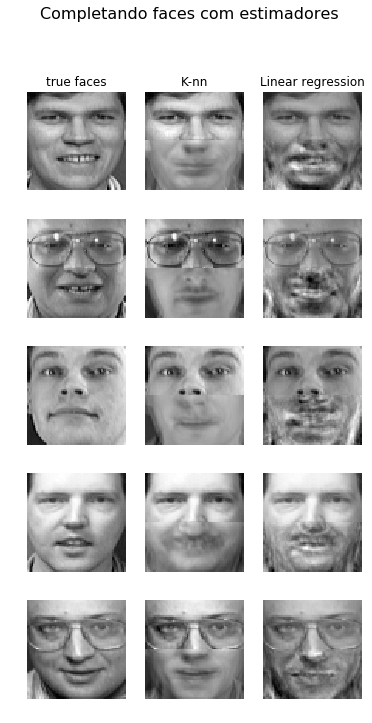

In [25]:
# Estimadores
ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression()
}

# Imprimindo as faces
image_shape = (64, 64)

# O número de colunas é a quantidade de algoritmos (cada imagem gerada por um) e a imagem original
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Completando faces com estimadores", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))    # Seleciona a imagem original

    if i:    # Posição da imagem
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")    # Diminui a resolução, torna a imagem preto e branco

    for j, est in enumerate(sorted(ESTIMATORS)):    # Para cada um dos algoritmos
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))    # Pega a imagem estimada pelo algoritmo

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## Árvore de Decisão

In [26]:
# Mais informações em
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Voltamos a usar a base de dados de plantas Íris.

In [27]:
# Parâmetros
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Mesma base de dados do algoritmo anterior
iris = load_iris()

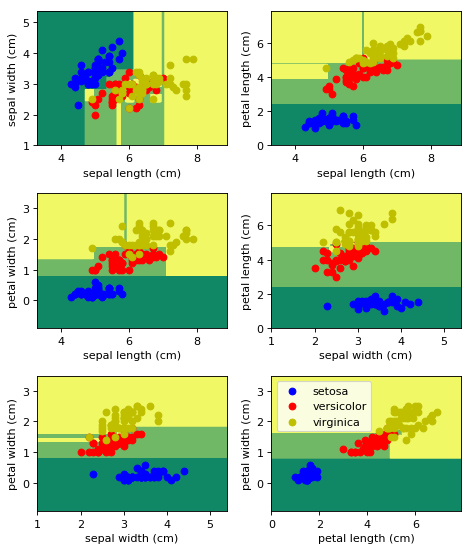

In [28]:
plt.figure(num = None, figsize = (6, 7), dpi = 80)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    # Usa apenas dois parâmetros para representar cada objeto
    X = iris.data[:, pair]
    y = iris.target
    
    ##############################################################################
    # Treinamento
    ##############################################################################
    clf = DecisionTreeClassifier().fit(X, y)

    # Mostra os limites (onde passa de uma classe para outra)
    plt.subplot(3, 2, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    ##############################################################################
    # Testes
    ##############################################################################
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.summer)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Mostrando os pontos usandos para o treino
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Código para gerar a árvore de decisão utilizada no exemplo atual
# Precisa instalar antes: sudo apt-get install graphviz
from sklearn import tree              # É um módulo que possui as árvores de decisão para regressão e classificação
!pip install pydotplus                # Python Interface com Graphviz
import pydotplus                      # http://www.graphviz.org/

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")          # Salva a árvore no pdf

The directory '/home/cursopython/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/cursopython/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


InvocationException: GraphViz's executables not found

## Exercício 3 (Árvore de Decisão)

Usando o seguinte banco de dados usar o algortimo de árvore de decisão para descobrir classes de animes.

In [ ]:
# Importando os dados
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
animes = pd.read_csv("dados/animes.csv", ";")
animes.head()

# genres: mecha, music, historical

# Vamos definir 3 classes: 
# -> 0: animes bons
# -> 1: animes médianos
# -> 2: animes ruins 

class_ = []
for id_, row in animes.iterrows():
    if random.randint(0, 10) < 8:
        rating = row['rating']
        if rating > 7:
            class_.append(0)
        elif rating <= 7 and rating > 5:
            class_.append(1)
        else:
            class_.append(2)
    else: # Vamos adicionar algum ruído
        class_.append(random.randint(0, 2))
animes["class"] = class_
animes.head()

In [ ]:
animes_features = animes.drop(["id", "name", "class", "source", "type"], axis = 1)
animes_features.head()

In [ ]:
animes_target = animes["class"]
animes_target.head()

In [ ]:
# Separando a base de dados entre treino e teste
test_size = 0.2

a_features_train, a_features_test, a_target_train, a_target_test = train_test_split(X, y, test_size = test_size, random_state = 6)

clf = DecisionTreeClassifier().fit(a_features_train, a_target_train)
# OU:
# clf = DecisionTreeClassifier()
# clf.fit(a_features_train, a_target_train)

decision_tree_pred = clf.predict(a_features_test)
print(decision_tree_pred)

## SVM

Breves comentários: o SVM funciona como um classificador binário, dada uma base de dados ele tenta dividir essa base usando um hiperplano. Para utilizar com mais de uma classe, basta pensar o seguinte, temos 4 classes, cada classe é um bit, dessa forma, temos que 0001, 0010, 0100 e 1000, onde o primeiro bit (menos significativo representa a classe 0, e assim por diante).

In [ ]:
# Dúvidas? 
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# Importando o que é necessário (similar ao que já foi feito antes)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Mesma base de dados conhecida
iris = datasets.load_iris()
X = iris.data[:, :2] # Vamos simplificar nossos dados
y = iris.target

h = .02 # para plotagem
C = 1.0  # parâmetro para SVM 

In [ ]:
# Agora o classificador 
clf = svm.LinearSVC(C = C)
clf.fit(X, y)

# Criamos uma malha de pontos para plotar (similar a outros exemplos)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultados da malha
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

# Agora os pontos usados para treinar
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker = '.')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('LinearSVC (linear kernel)')

plt.show()

## Exercício 4

Use a mesma base com animes para fazer classificação dos animes, agora usando o SVM.

In [ ]:
# Feito pelo aluno
# Importando os dados
import pandas as pd
import random
from sklearn import svm

clf = svm.LinearSVC(C = 1.0)
clf.fit(a_features_train, a_target_train)
linear_svm_pred = clf.predict(a_features_test)
print(linear_svm_pred)